 ---
 # Prática 5: Análisis en el dominio del tiempo (DT) del circuito serie de primer orden R-C. Carga y Descarga de un Condesador.
 ---
> Autores: Jorge del Río López, Carlos González García y Javier Rodríguez Urbano.
>
> Fecha: 2024-11-26
>
> Curso 24-45 
---
<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/e8/6c/d4/e86cd4446daa867f88666c90ec10b0d4.jpg" alt="Logo" style="width: 20%;"/>
</div>


In [396]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
# Definimos el valor de Pi
Pi = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093

In [397]:
# Importamos el fichero que contiene los datos.
xlsx_name="P5_PlantillaMedidasEstudiantes.ods"

In [398]:
#Creamos una funcion para convertir n listas en arrays.
def ConverArray3 (lista,lista2,lista3):
    return np.array(lista), np.array(lista2),np.array(lista3)

def ConverArray2 (lista,lista2):
    return np.array(lista), np.array(lista2)

#Funcioón que usaremos para calcular errores relativos.
def ErrorRelativo(exp,teor):
    return (abs(exp - teor)/abs(teor))*100
# Funcion que realiza un ajuste lineal.
def calcular_ajuste_lineal(x, y):
    """
    Calcula la pendiente (m) y la intersección (b) de la recta de ajuste lineal.

    Parámetros:
        x (list): Lista de valores de la variable independiente.
        y (list): Lista de valores de la variable dependiente.

    Retorna:
        tuple: Pendiente (m) e intersección (b) de la recta.
    """
    if len(x) != len(y):
        raise ValueError("Las listas x e y deben tener la misma longitud.")

    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(xi * yi for xi, yi in zip(x, y))
    sum_x2 = sum(xi**2 for xi in x)

    # Cálculo de m y b
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    b = (sum_y - m * sum_x) / n

    return m, b







def ValorR(pendiente, intercep,frecu):
    return frecu*pendiente + intercep


---
<h1 style="text-align: center;">[P4.C1]</h1>

---


In [399]:
DatosParte1 = pd.read_excel(xlsx_name,sheet_name="RC")

# Extraemos los valores:

ValorResistencia = DatosParte1["R"].tolist()
ValorCondensador = DatosParte1["C"].tolist()


# Extraemos los valores Teóricos y Prácticos.

#--------------------------------------------------------------
#Resistencia
#--------------------------------------------------------------

ResistenciaTeo = ValorResistencia[0]
ResistenciaPra = ValorResistencia[1]

#--------------------------------------------------------------
# Capacidad
#--------------------------------------------------------------

CapacidadTeo = ValorCondensador[0]
CapacidadPra = ValorCondensador[1]


# Calculo del valor del tiempo de Relajación teórico.

TiempoRelajacionTeo = ResistenciaTeo*CapacidadTeo

# Calculo del valor del tiempo de Relajación práctico.

TiempoRelajacionPra = ResistenciaPra*CapacidadPra

print(f'La Resistencia teórica es: {round(ResistenciaTeo,2)} Ohms.')
print(f'La Resistencia práctica es: {round(ResistenciaPra,2)} Ohms.')
print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(ResistenciaPra,ResistenciaTeo),2)} %.\n')

print(f'La Capacidad teórica es: {CapacidadTeo} F.')
print(f'La Capacidad práctica es: {CapacidadPra} F.')
print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(CapacidadPra,CapacidadTeo),2)} %.\n')


print(f'El tiempo de relajación Teórica es: {round(TiempoRelajacionTeo,2)} s.')
print(f'El tiempo de relajación Práctica es: {round(TiempoRelajacionPra,2)} s.')
print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(TiempoRelajacionPra,TiempoRelajacionTeo),2)} %.')

La Resistencia teórica es: 10000 Ohms.
La Resistencia práctica es: 9930 Ohms.
Esto nos proporciona un error relativo del: 0.7 %.

La Capacidad teórica es: 0.0047 F.
La Capacidad práctica es: 0.00413 F.
Esto nos proporciona un error relativo del: 12.13 %.

El tiempo de relajación Teórica es: 47.0 s.
El tiempo de relajación Práctica es: 41.01 s.
Esto nos proporciona un error relativo del: 12.74 %.


---
<h1 style="text-align: center;">[P4.C2]</h1>

---

$log(1-\dfrac{v_c}{V_s})\ =\ \dfrac{log(e)}{\tau}\ t -\ \dfrac{t_0}{\tau}log(e) $

In [400]:
DatosParte2 = pd.read_excel(xlsx_name,sheet_name="DatosEnTiempo")

# Extraemos los valores:
Tiempo = DatosParte2["t"].tolist()
VoltajeCondensador = DatosParte2["vc"].tolist()
VoltajeFuentelist = DatosParte2["Vs"].tolist()
VoltajeFuente =  VoltajeFuentelist[0]

TiempoList = Tiempo.copy()
VoltajeCondensadorList = VoltajeCondensador.copy()

Tiempo, VoltajeCondensador = ConverArray2(Tiempo,VoltajeCondensador)

Datos ajuste: R= 0.01373118079889366 1/s 
Ordenada en el origen:  0.2341604216019739 QQ 
 coorel coef= [[ 2.69770922e-08 -2.68422067e-06]
 [-2.68422067e-06  3.55211869e-04]]


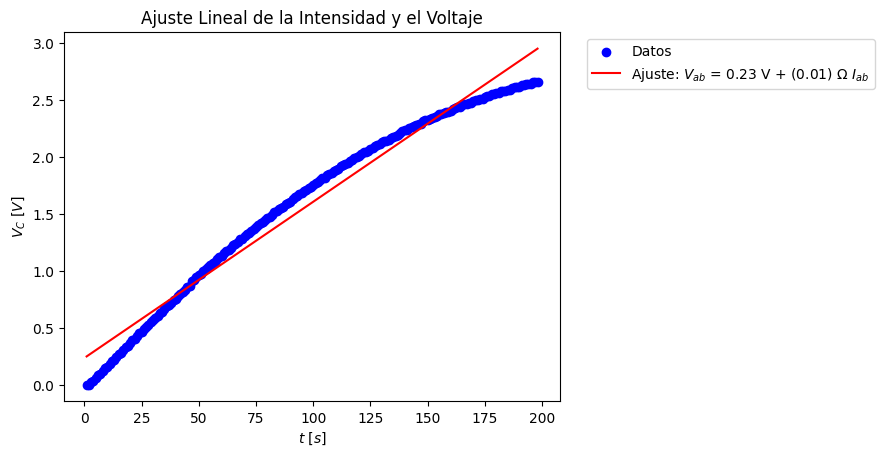

In [401]:
VoltajeCondensadorCarga = VoltajeCondensador[0:198].copy()
VoltajeCondensadorDesCarga = VoltajeCondensador[198:350].copy()

TiempoCarga = Tiempo[0:198].copy()
TiempoDesCarga = Tiempo[198:350].copy()
#Ponemos los datos en una tabla.

data = {'t[s]': TiempoCarga,
        'Vc[V]': VoltajeCondensadorCarga}
df = pd.DataFrame(data)
#print(f'Datos:\n{df}\n')
# Obtenemos los valores de la abcisas
yCarga = []
for i in VoltajeCondensadorCarga:
   #yCarga.append(np.log(1-(i/VoltajeFuente)))
   #yCarga.append((VoltajeFuente/(VoltajeFuente-i))**(8/13))
   yCarga.append(np.log((VoltajeFuente/(VoltajeFuente-i))))
   #yCarga.append(np.log((VoltajeFuente-i)/VoltajeFuente))
    #yCarga.append(np.log((VoltajeFuente-i)/VoltajeFuente))

    
# Realizamos el ajuste lineal con np.polyfit
print('Datos ajuste: ',end='')
[slopeC, interceptC], r = np.polyfit(TiempoCarga,yCarga,deg=1,cov=True)
print("R=", slopeC,"1/s","\nOrdenada en el origen: ", interceptC,"QQ","\n coorel coef=",r)




# Crear una función para la línea ajustada
def ajuste_lineal(x):
    return slopeC * x + interceptC

# Graficamos los datos y el ajuste lineal
plt.scatter(TiempoCarga, yCarga, label='Datos', color='blue')
plt.plot(TiempoCarga, ajuste_lineal(TiempoCarga), color='red', label=fr'Ajuste: $V_{{ab}}$ = {interceptC:.2f} V + ({slopeC:.2f}) $\Omega$ $I_{{ab}}$')
plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title('Ajuste Lineal de la Intensidad y el Voltaje')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [402]:
# A partir de los datos de la Ordenada en el origen y de la pendiente obtenemos los valores de C y tau.

TauPracticaCarga =  1/slopeC

# Calculamos el valor de C
CapacidadPracticaCarga = TauPracticaCarga/ResistenciaPra

print(f'El tiempo de relajación Teórica es: {round(TauPracticaCarga,2)} s.')
print(f'El tiempo de relajación Teórica es: {round(CapacidadPracticaCarga,4)} F.')

El tiempo de relajación Teórica es: 72.83 s.
El tiempo de relajación Teórica es: 0.0073 F.


---
<h1 style="text-align: center;">[P4.C3]</h1>

---


Datos:
     t[s]  Vc[V]
0     199  9.302
1     200  9.244
2     201  9.123
3     202  8.890
4     203  8.665
..    ...    ...
147   346  0.497
148   347  0.486
149   348  0.480
150   349  0.470
151   350  0.459

[152 rows x 2 columns]

Datos ajuste: R= -0.020029119463241866 1/s 
Ordenada en el origen:  3.90867426360618 QQ 
 coorel coef= [[ 3.56964536e-10 -9.79867652e-08]
 [-9.79867652e-08  2.75846130e-05]]


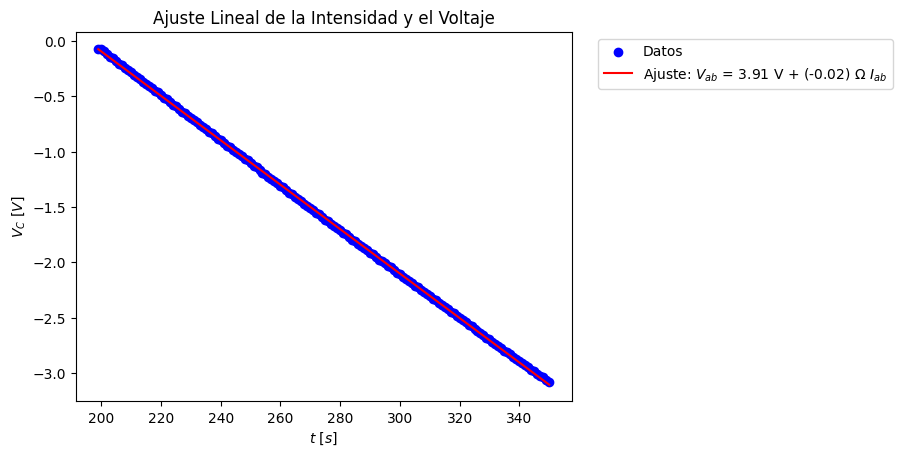

In [403]:
#Ponemos los datos en una tabla.
data = {'t[s]': TiempoDesCarga,
        'Vc[V]': VoltajeCondensadorDesCarga}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')
# Obtenemos los valores de la abcisas
yDescarga = []
for i in VoltajeCondensadorDesCarga:
    yDescarga.append(np.log((i/VoltajeFuente)))

# Realizamos el ajuste lineal con np.polyfit
print('Datos ajuste: ',end='')
[slopeD, interceptD], r = np.polyfit(TiempoDesCarga,yDescarga,deg=1,cov=True)
print("R=", slopeD,"1/s","\nOrdenada en el origen: ", interceptD,"QQ","\n coorel coef=",r)


# Crear una función para la línea ajustada
def ajuste_lineal(x):
    return interceptD + slopeD * x

# Graficamos los datos y el ajuste lineal
plt.scatter(TiempoDesCarga, yDescarga, label='Datos', color='blue')
plt.plot(TiempoDesCarga, ajuste_lineal(TiempoDesCarga), color='red', label=fr'Ajuste: $V_{{ab}}$ = {interceptD:.2f} V + ({slopeD:.2f}) $\Omega$ $I_{{ab}}$')
plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title('Ajuste Lineal de la Intensidad y el Voltaje')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

In [404]:
# A partir de los datos de la Ordenada en el origen y de la pendiente obtenemos los valores de C y tau.

TauPracticaDesCarga = - 1/slopeD

# Calculamos el valor de C
CapacidadPracticaDesCarga = TauPracticaDesCarga/ResistenciaPra

print(f'El tiempo de relajación Teórica es: {round(TauPracticaDesCarga,2)} s.')
print(f'El tiempo de relajación Teórica es: {round(CapacidadPracticaDesCarga,5)} F.')

El tiempo de relajación Teórica es: 49.93 s.
El tiempo de relajación Teórica es: 0.00503 F.


---
<h1 style="text-align: center;">[P4.C4]</h1>

---



Ahora nos piden que comparemos los valores de $\tau$. EXPLICAR DE DONDE SALEN

$\tau_{Carga}\ =\ 72.83\ s$

$\tau_{Descarga}\ =\ 49.93\ s$

$\tau_{Teórico}\ =\ 47.00\ s$

$\tau_{Práctica}\ =\ 41.00\ s$

Para cada uno de estos valores obtenemos un error relativo, tomando el valor teórico como correcto llegamos a:

$\epsilon_R(Carga)\ =\ $

$\epsilon_R(Descarga)\ =\ $

$\epsilon_R(Práctica)\ =\ $

---
<h1 style="text-align: center;">[P4.C5]</h1>

---


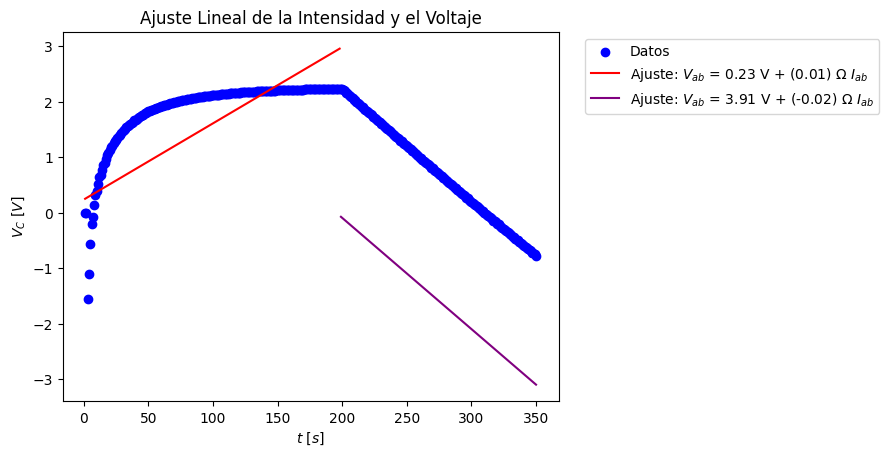

In [405]:
def ajuste_linealD(x):
    return slopeD * x + interceptD 

def ajuste_linealC(x):
    return slopeC * x + interceptC

Ejey = []

for i in VoltajeCondensador:
    if i!= 0:
        #Ejey.append(np.log(i/VoltajeFuente))
        Ejey.append(np.log(i))
        #Ejey.append(i)
    else:
        Ejey.append(0)

# Graficamos los datos y el ajuste lineal
#plt.scatter(Tiempo, VoltajeCondensador, label='Datos', color='blue')
plt.scatter(Tiempo, Ejey, label='Datos', color='blue')

plt.plot(TiempoCarga, ajuste_linealC(TiempoCarga), color='red', label=fr'Ajuste: $V_{{ab}}$ = {interceptC:.2f} V + ({slopeC:.2f}) $\Omega$ $I_{{ab}}$')
plt.plot(TiempoDesCarga, ajuste_linealD(TiempoDesCarga), color='purple', label=fr'Ajuste: $V_{{ab}}$ = {interceptD:.2f} V + ({slopeD:.2f}) $\Omega$ $I_{{ab}}$')

plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title('Ajuste Lineal de la Intensidad y el Voltaje')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")



plt.show()


---
<h1 style="text-align: center;">[P4.C6]</h1>

---

In [406]:
# Creamos la función que nos piden:

# Funcion Fourier.



def Fourier(v,t,f):
    sumaReal = 0
    sumaCompleja = 0
    for j,i in enumerate(t):
        if j == 0:
            sumaReal += np.cos(2*Pi*i*f)* v[j] * ((t[j+1]-i)/2)
            sumaCompleja += np.sin(2*Pi*i*f)* v[j] * ((t[j+1]-i)/2)
        elif j == len(t)-1:
            sumaReal += np.cos(2*Pi*i*f)*v[j] * ((i-t[j-1])/2)
            sumaCompleja += np.sin(2*Pi*i*f)* v[j] * ((i-t[j-1])/2)
        else:
            sumaReal += np.cos(2*Pi*i*f)* v[j] * ((t[j+1]-t[j-1])/2)
            sumaCompleja += np.sin(2*Pi*i*f) * v[j]* ((t[j+1]-t[j-1])/2)
    return sumaReal , -sumaCompleja


---
<h1 style="text-align: center;">[P4.C7]</h1>

---

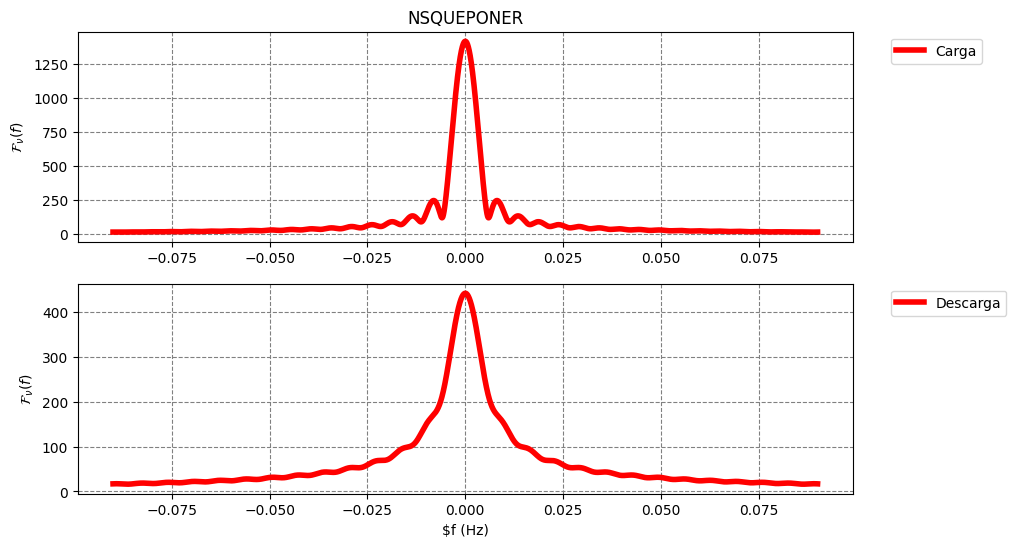

In [407]:
ModuloCarga = []
ModuloDescarga = []

frec=np.linspace(-0.09,0.09,10000)
for i in frec:
    RealCarga, ComplejaCarga = Fourier(VoltajeCondensadorCarga,TiempoCarga,i)
    #print(ComplejaCarga)
    RealDesCarga, ComplejaDesCarga = Fourier(VoltajeCondensadorDesCarga,TiempoDesCarga,i)
    ModuloCarga.append(np.sqrt(RealCarga**2 + ComplejaCarga**2))
    ModuloDescarga.append(np.sqrt(RealDesCarga**2 + ComplejaDesCarga**2))

# Graficar el diagrama de  Bode - Ganancia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frec, ModuloCarga,label="Carga",color="red",lw=4)  # Gráfica semilogarítmica
plt.title("NSQUEPONER")
plt.ylabel(r"$\mathcal{F}_\nu (f)$")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")

# Graficar el Bode - Fase (radianes)
plt.subplot(2, 1, 2)
plt.plot(frec, ModuloDescarga,label="Descarga",color="red",lw=4)  # Gráfica semilogarítmica
plt.ylabel(r"$\mathcal{F}_\nu (f)$")
plt.xlabel(r"$f (Hz)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")